# Pandas

Read the input data for all Netrunner cards:

<https://github.com/Alsciende/netrunner-cards-json>

In [1]:
import glob
import pandas

# read all files from pack/
files = glob.glob('pack/*.json')
packs = []
for file in files:
    packs.append(pandas.read_json(file,orient='records'))

# Use Pandas for data analysis
cards = pandas.concat(packs,sort=False)

# use the unique card identifier as index
cards.set_index('code',inplace=True)

# remove duplicate cards (i.e. from the Core sets)
cards.drop_duplicates('title',inplace=True)

[README.md](README.md) describes the card JSON schema.

## Cards

List all card titles:

In [2]:
# read columns card title and type, sort by title
cards[['title','type_code']].sort_values(by='title').head(10)

,title,type_code
code,,
10052,"""Clones are not People""",operation
10045,"""Freedom Through Equality""",event
9004,15 Minutes,agenda
9019,24/7 News Cycle,operation
21063,419: Amoral Scammer,identity
22036,API-S Keeper Isobel,asset
12115,AR-Enhanced Security,agenda
11106,Aaron Marrón,resource
13006,Abagnale,program


Find a specific card

In [10]:
# do not truncate strings
pandas.set_option('display.max_colwidth', -1)

cards[cards['title'].str.match('Noise')][['type_code','faction_code','title','text']]

,type_code,faction_code,title,text
code,,,,
1001,identity,anarch,Noise: Hacker Extraordinaire,"Whenever you install a <strong>virus</strong> program, the Corp trashes the top card of R&D."


## Card Types

List all card types, and the number of cards for a given type

In [4]:
cards['type_code'].value_counts()

ice          221
program      173
resource     165
event        158
operation    153
asset        147
agenda       116
hardware     100
identity     97 
upgrade      81 
Name: type_code, dtype: int64

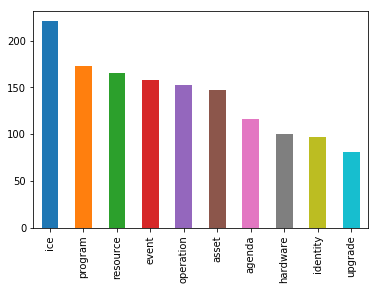

In [8]:
cards['type_code'].value_counts().plot(kind='bar')

### By Faction

Select a specific card-type and count the cards per faction

In [6]:
programs = cards[cards['type_code'] == 'program']
programs['faction_code'].value_counts()

shaper            62
anarch            52
criminal          46
neutral-runner    4 
apex              4 
sunny-lebeau      3 
adam              2 
Name: faction_code, dtype: int64

ICE with faction and keywords

In [11]:
ice = cards[cards['type_code'] == 'ice']
ice[['title','faction_code','keywords']].head(10)

,title,faction_code,keywords
code,,,
11075,Data Ward,nbn,Barrier
11078,Bulwark,weyland-consortium,Barrier - Illicit
10032,Harvester,jinteki,Code Gate
9013,Archangel,nbn,Code Gate - Tracer - Ambush
9014,News Hound,nbn,Sentry - Tracer
9015,Resistor,nbn,Barrier - Tracer
9016,Special Offer,nbn,Trap - Advertisement
9017,TL;DR,nbn,Code Gate
9018,Turnpike,nbn,Sentry - Tracer
